In [ ]:
import tensorflow
from tensorflow import keras

In [ ]:
#binary_acc, sgd, 2 densas, aumentar batchsize, vectorizar texto y volverlo binario

In [1]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D
from keras.optimizers import SGD

# Cargar el conjunto de datos de IMDB
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)




17464789/17464789 [==============================] - 0s 0us/step


Ver algunos ejemplos de la base de datos

In [2]:
# Obtener el índice de la palabra en el diccionario
word_index = imdb.get_word_index()

# Convertir el índice de la palabra en la palabra correspondiente
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Deshacer la codificación de la reseña para ver el texto
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Imprimir algunas reseñas y sus etiquetas correspondientes
for i in range(5):
    print("Review:", decode_review(x_train[i]))
    print("Label:", y_train[i])
    print()

1641221/1641221 [==============================] - 0s 0us/step
Review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children 

In [3]:
def vectorize_sequences(sequences, dimension=num_words):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0  # poner 1 en cada posición correspondiente a la palabra en la secuencia
    return results

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

Modelos Deep Learning

Primer modelo, con una capa densa y un capa densa de salida

In [4]:
import matplotlib.pyplot as plt

def train_and_visualize_model(batch_size):
    # Construir el modelo
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(num_words,)))
    model.add(Dense(1, activation='sigmoid'))

    # Compilar el modelo
    model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['binary_accuracy'])


    model.summary()


    # Entrenar el modelo
    history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

    # Graficar entrenamiento
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 5))

    # Graficar pérdida
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Training loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Graficar accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['binary_accuracy'], label='Training accuracy')
    plt.plot(epochs, history.history['val_binary_accuracy'], label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()



    return history, model

Batch size: 16

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280128   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280257 (4.88 MB)
Trainable params: 1280257 (4.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1250/1250 [==============================] - 23s 17ms/step - loss: 0.4982 - binary_accuracy: 0.7875 - val_loss: 0.3776 - val_binary_accuracy: 0.8458
Epoch 2/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.3276 - binary_accuracy: 0.8650 - val_loss: 0.3177 - val_binary_accuracy: 0.8718
Epoch 3/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.2769 - binary_

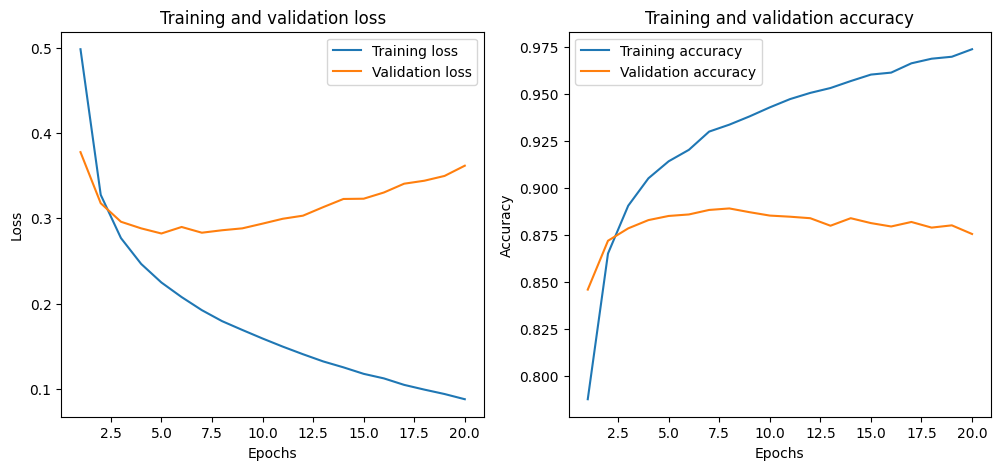

In [5]:
history_16, model_16 = train_and_visualize_model(16)

Batch size: 32

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               1280128   
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280257 (4.88 MB)
Trainable params: 1280257 (4.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
625/625 [==============================] - 11s 17ms/step - loss: 0.5679 - binary_accuracy: 0.7527 - val_loss: 0.4642 - val_binary_accuracy: 0.8100
Epoch 2/20
625/625 [==============================] - 9s 14ms/step - loss: 0.3982 - binary_accuracy: 0.8454 - val_loss: 0.3688 - val_binary_accuracy: 0.8538
Epoch 3/20
625/625 [==============================] - 9s 15ms/step - loss: 0.3330 - binary_accura

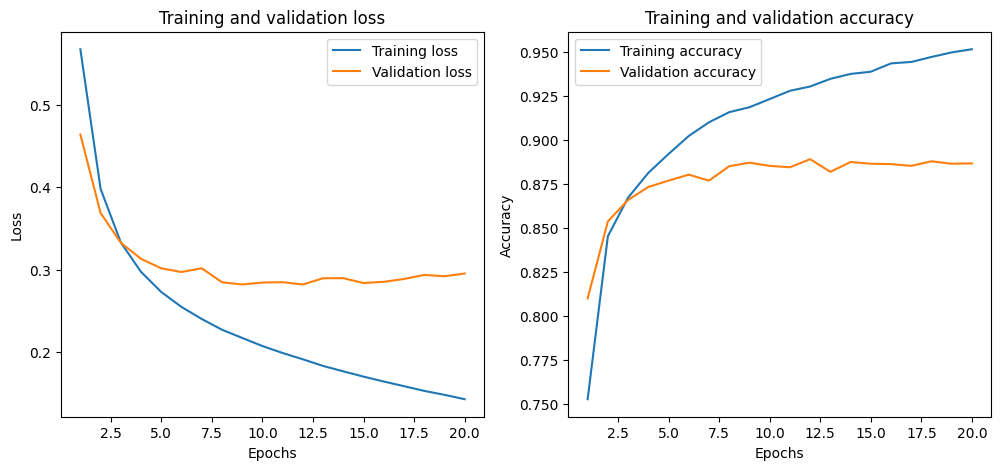

In [6]:
history_32, model_32 = train_and_visualize_model(32)

Batchsize 64

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1280128   
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280257 (4.88 MB)
Trainable params: 1280257 (4.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
313/313 [==============================] - 7s 21ms/step - loss: 0.6339 - binary_accuracy: 0.7007 - val_loss: 0.5640 - val_binary_accuracy: 0.7818
Epoch 2/20
313/313 [==============================] - 6s 20ms/step - loss: 0.5046 - binary_accuracy: 0.8076 - val_loss: 0.4611 - val_binary_accuracy: 0.8226
Epoch 3/20
313/313 [==============================] - 6s 19ms/step - loss: 0.4215 - binary_accurac

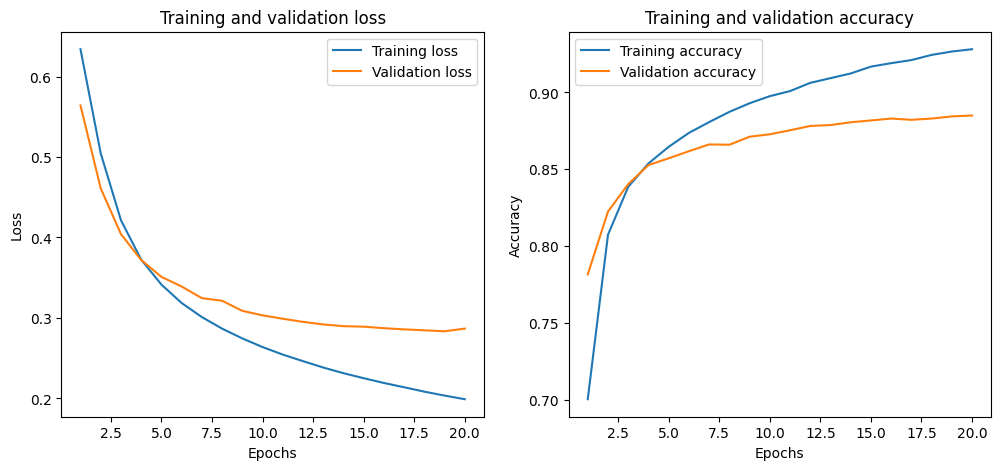

In [7]:
history_64, model_64 = train_and_visualize_model(64)

Aumentar una segunda capa densa

In [8]:
import matplotlib.pyplot as plt

def train_and_visualize_model_2do(batch_size):
    # Construir el modelo
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(num_words,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compilar el modelo
    model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['binary_accuracy'])


    model.summary()


    # Entrenar el modelo
    history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

    # Graficar entrenamiento
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 5))

    # Graficar pérdida
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Training loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Graficar accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['binary_accuracy'], label='Training accuracy')
    plt.plot(epochs, history.history['val_binary_accuracy'], label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()



    return history, model

Batch size: 16

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1280128   
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1288449 (4.92 MB)
Trainable params: 1288449 (4.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1250/1250 [==============================] - 15s 12ms/step - loss: 0.4722 - binary_accuracy: 0.7889 - val_loss: 0.3321 - val_binary_accuracy: 0.8628
Epoch 2/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.2939 - binary_accuracy: 0.8788 - val_los

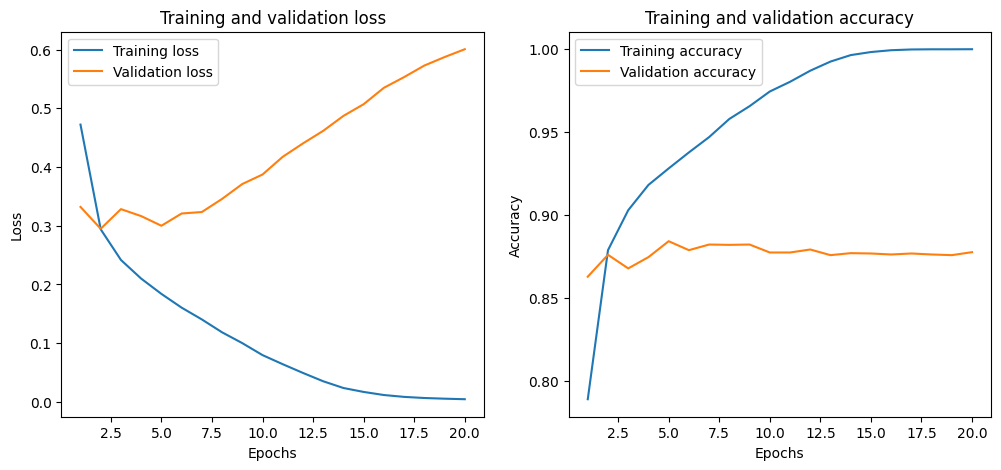

In [9]:
history_16_2do, model_16_2do = train_and_visualize_model_2do(16)

Batch size: 32

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               1280128   
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1288449 (4.92 MB)
Trainable params: 1288449 (4.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
625/625 [==============================] - 10s 16ms/step - loss: 0.5743 - binary_accuracy: 0.7351 - val_loss: 0.4267 - val_binary_accuracy: 0.8352
Epoch 2/20
625/625 [==============================] - 9s 15ms/step - loss: 0.3603 - binary_accuracy: 0.8546 - val_loss: 0.

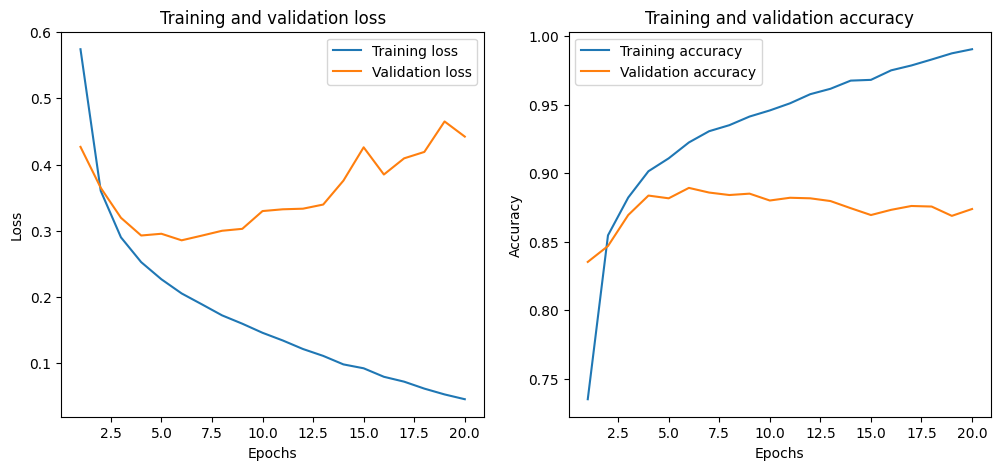

In [10]:
history_32_2do, model_32_2do = train_and_visualize_model_2do(32)

Batch size: 64

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1280128   
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1288449 (4.92 MB)
Trainable params: 1288449 (4.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
313/313 [==============================] - 8s 23ms/step - loss: 0.6596 - binary_accuracy: 0.6459 - val_loss: 0.5943 - val_binary_accuracy: 0.7742
Epoch 2/20
313/313 [==============================] - 6s 20ms/step - loss: 0.5032 - binary_accuracy: 0.8127 - val_loss: 0.4

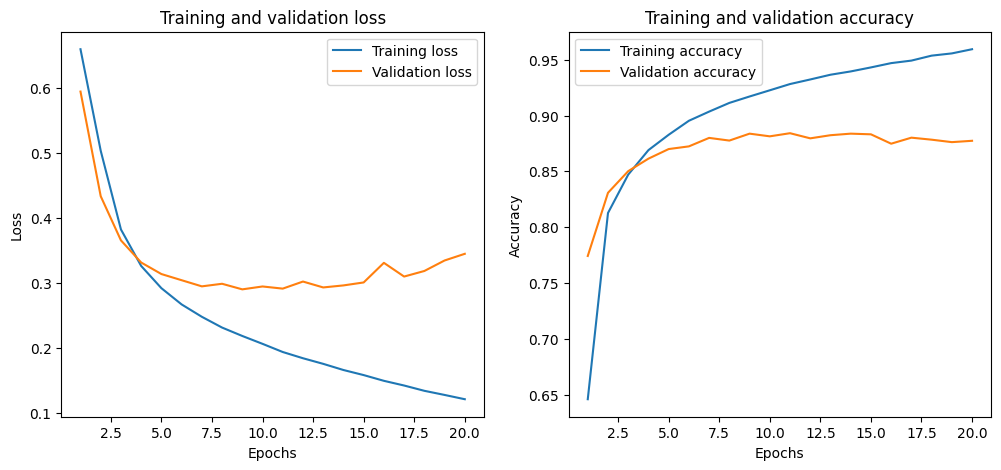

In [11]:
history_64_2do, model_64_2do = train_and_visualize_model_2do(64)

Mejor modelo con batch size: 16

In [14]:
test_loss, test_acc = model_16.evaluate(x_test, y_test)
print(f'Test accuracy with batch size {16}: {test_acc}')

782/782 [==============================] - 11s 14ms/step - loss: 0.3848 - binary_accuracy: 0.8689
Test accuracy with batch size 16: 0.8689200282096863


782/782 [==============================] - 6s 7ms/step


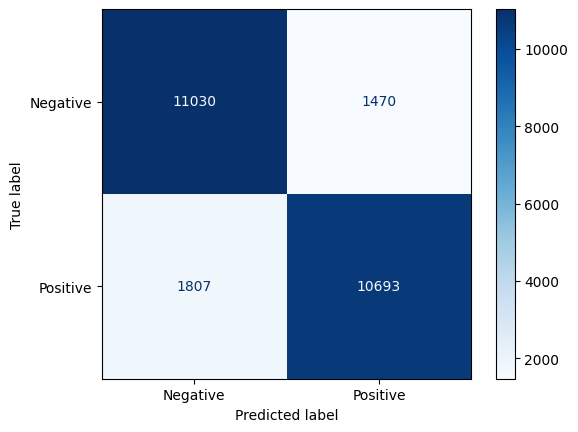

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predicciones en el conjunto de prueba
y_pred = (model_16.predict(x_test) > 0.5).astype("int32")

# Generar matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.show()